# Using the QUBO Reordeing Method as part of the Sparse LU Linear Solver
This notebook illustrates how to us the QUBO reordering approach included in `QuantumNewonRaphson` via our `qreorder` library. 
We first need to sdefine the linear system:

$$A \cdot x = b$$

We use here a randon sparse matrix $A$ and a random right hand side vector $b$

In [5]:
import scipy.sparse as spsp
import numpy as np 
A = spsp.random(5,5, density = 0.5, format='csr')
A = A + A.T
b = spsp.random(5, 1, density = 0.5, format='csr')
b = b.todense()

## Classical solution
We can use the `SPLU` solver of the library to compute the solution of the linear system without changing the ordering of the matrix 

In [7]:
from quantum_newton_raphson.splu_solve import SPLU_SOLVER

# define the linear solver with the reorder solver
solver = SPLU_SOLVER()
res_ref = solver(A,b)

/home/nico/miniconda3/envs/alliander_powerflow/lib/python3.9/site-packages/scipy/sparse/linalg/_dsolve/linsolve.py:412: SparseEfficiencyWarning: splu converted its input to CSC format
  warn('splu converted its input to CSC format', SparseEfficiencyWarning)


## Quantum Reodring Solution
We can use the `qreorder` capabilities to find an optimal reordering of the matrix

In [9]:
from dwave.samplers import SimulatedAnnealingSampler
from qreorder.quantum import QuantumSolver

# instantiate the quantum reorder solver using a DWAVE sampler
reorder_solver = QuantumSolver(
    sampler = SimulatedAnnealingSampler()
)
# define the linear solver with the reorder solver
solver = SPLU_SOLVER(reorder_solver=reorder_solver)
res = solver(A,b)

## Visualize the results

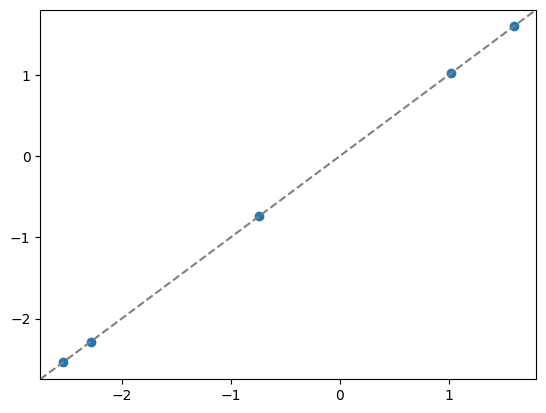

In [11]:
import matplotlib.pyplot as plt
_ = plt.axline( (0,0), slope=1,linestyle='--',color='grey')
plt.scatter(res.solution,res_ref.solution)

## Investigate the fill in in the LU matrices
We can check how much the reordering of the matrix elements change in the density of the L and U matrices of the LU decomposition 

In [14]:
res.splu.L

<5x5 sparse matrix of type '<class 'numpy.float64'>'
	with 10 stored elements in Compressed Sparse Column format>

In [13]:
res_ref.splu.L

<5x5 sparse matrix of type '<class 'numpy.float64'>'
	with 15 stored elements in Compressed Sparse Column format>